In [35]:
#First Task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

male = np.genfromtxt(
    '/content/nhanes_adult_male_bmx_2020 (2).csv',
    delimiter=',',
    skip_header=1
)

female = np.genfromtxt(
    '/content/nhanes_adult_female_bmx_2020 (1).csv',
    delimiter=',',
    skip_header=1
)


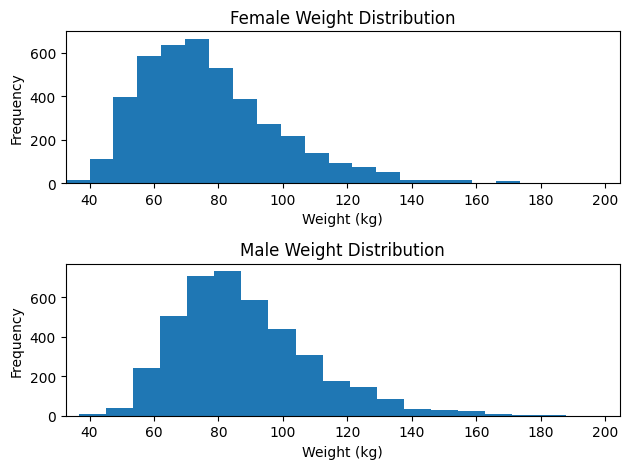

In [36]:
#second Task

import matplotlib.pyplot as plt

male_weights = male[:, 0]
female_weights = female[:, 0]

# Remove missing values
male_weights = male_weights[~np.isnan(male_weights)]
female_weights = female_weights[~np.isnan(female_weights)]

plt.figure()

plt.subplot(2, 1, 1)
plt.hist(female_weights, bins=20)
plt.title("Female Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

plt.subplot(2, 1, 2)
plt.hist(male_weights, bins=20)
plt.title("Male Weight Distribution")
plt.xlabel("Weight (kg)")
plt.ylabel("Frequency")

xmin = min(female_weights.min(), male_weights.min())
xmax = max(female_weights.max(), male_weights.max())

plt.subplot(2, 1, 1)
plt.xlim(xmin, xmax)
plt.subplot(2, 1, 2)
plt.xlim(xmin, xmax)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1021168227.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])


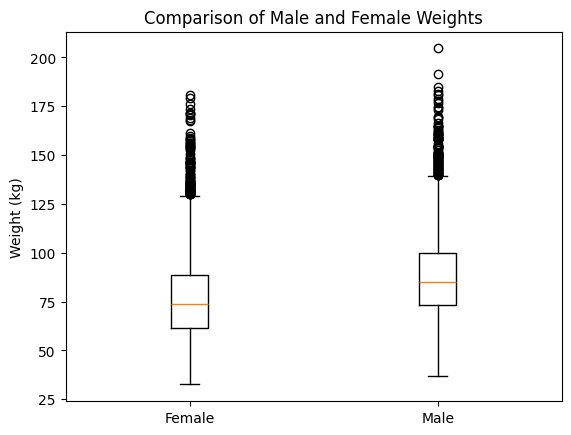

In [37]:
#Third Task

plt.figure()
plt.boxplot([female_weights, male_weights], labels=["Female", "Male"])
plt.title("Comparison of Male and Female Weights")
plt.ylabel("Weight (kg)")
plt.show()

In [38]:
#Fourth Task

from scipy.stats import skew

def summary_stats(data):
    return {
        "Mean": np.mean(data),
        "Median": np.median(data),
        "Standard Deviation": np.std(data),
        "Variance": np.var(data),
        "Minimum": np.min(data),
        "Maximum": np.max(data),
        "Skewness": skew(data)
    }

male_stats = summary_stats(male_weights)
female_stats = summary_stats(female_weights)

male_stats, female_stats


({'Mean': np.float64(88.36454300416565),
  'Median': np.float64(85.0),
  'Standard Deviation': np.float64(21.418936717962495),
  'Variance': np.float64(458.770850128082),
  'Minimum': np.float64(36.8),
  'Maximum': np.float64(204.6),
  'Skewness': np.float64(0.9842810741662347)},
 {'Mean': np.float64(77.40379057095475),
  'Median': np.float64(73.6),
  'Standard Deviation': np.float64(21.54250829019315),
  'Variance': np.float64(464.07966343304065),
  'Minimum': np.float64(32.6),
  'Maximum': np.float64(180.9),
  'Skewness': np.float64(1.03336107186799)})

In [39]:
#Fifth Task

female_weight = female[:, 0]
female_height_cm = female[:, 1]

female_height_m = female_height_cm / 100

valid_rows = ~np.isnan(female_weight) & ~np.isnan(female_height_m)

female_bmi = np.full(female.shape[0], np.nan)

female_bmi[valid_rows] = (
    female_weight[valid_rows] / (female_height_m[valid_rows] ** 2)
)

female = np.column_stack((female, female_bmi))


In [40]:
#Sixth Task

female_mean = np.nanmean(female, axis=0)
female_std = np.nanstd(female, axis=0)

zfemale = (female - female_mean) / female_std


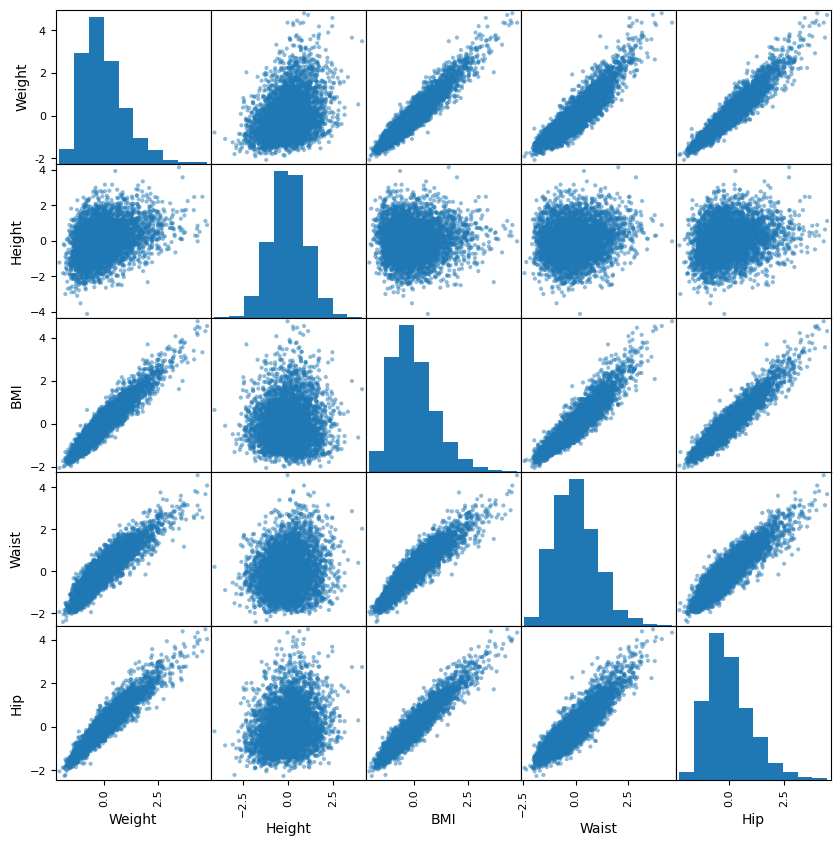

(          Weight    Height       BMI     Waist       Hip
 Weight  1.000000  0.345496  0.945900  0.904550  0.946553
 Height  0.345496  1.000000  0.033077  0.126547  0.202895
 BMI     0.945900  0.033077  1.000000  0.921198  0.944199
 Waist   0.904550  0.126547  0.921198  1.000000  0.897407
 Hip     0.946553  0.202895  0.944199  0.897407  1.000000,
           Weight    Height       BMI     Waist       Hip
 Weight  1.000000  0.338860  0.937999  0.900169  0.946634
 Height  0.338860  1.000000  0.019897  0.108587  0.205405
 BMI     0.937999  0.019897  1.000000  0.923114  0.934196
 Waist   0.900169  0.108587  0.923114  1.000000  0.888037
 Hip     0.946634  0.205405  0.934196  0.888037  1.000000)

In [41]:
#Seventh Task

from pandas import DataFrame
from pandas.plotting import scatter_matrix
from scipy.stats import pearsonr, spearmanr

cols = [0, 1, 7, 6, 5]
labels = ["Weight", "Height", "BMI", "Waist", "Hip"]

df = DataFrame(zfemale[:, cols], columns=labels)

scatter_matrix(df, figsize=(10, 10))
plt.show()

pearson_corr = df.corr(method='pearson')
spearman_corr = df.corr(method='spearman')

pearson_corr, spearman_corr


In [42]:
#Eigth Task

female_whr = female[:, 6] / female[:, 5]
female_wthr = female[:, 6] / female[:, 1]

female = np.column_stack((female, female_wthr, female_whr))

male_whr = male[:, 6] / male[:, 5]
male_wthr = male[:, 6] / male[:, 1]

male = np.column_stack((male, male_wthr, male_whr))


/tmp/ipython-input-2691974876.py:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


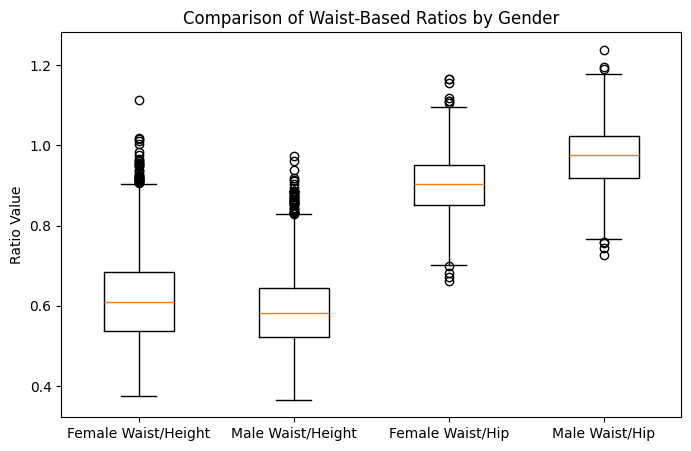

In [43]:
#Ninth Task

import numpy as np
import matplotlib.pyplot as plt

female_waist = female[:, 6]
female_height = female[:, 1]
female_hip = female[:, 5]

male_waist = male[:, 6]
male_height = male[:, 1]
male_hip = male[:, 5]

female_wthr = female_waist / female_height
female_whr = female_waist / female_hip

male_wthr = male_waist / male_height
male_whr = male_waist / male_hip

female_wthr = female_wthr[~np.isnan(female_wthr)]
female_whr = female_whr[~np.isnan(female_whr)]

male_wthr = male_wthr[~np.isnan(male_wthr)]
male_whr = male_whr[~np.isnan(male_whr)]

plt.figure(figsize=(8, 5))
plt.boxplot(
    [female_wthr, male_wthr, female_whr, male_whr],
    labels=[
        "Female Waist/Height",
        "Male Waist/Height",
        "Female Waist/Hip",
        "Male Waist/Hip"
    ]
)

plt.ylabel("Ratio Value")
plt.title("Comparison of Waist-Based Ratios by Gender")
plt.show()

In [44]:
#Tenth Task

BMI

Advantages: Simple, widely used.

Disadvantages: Ignores fat distribution and muscle mass.

Waist-to-Height Ratio

Advantages: Strong predictor of cardiovascular risk.

Disadvantages: Sensitive to measurement error.

Waist-to-Hip Ratio

Advantages: Indicates fat distribution.

Disadvantages: Hip circumference can distort interpretation.

SyntaxError: invalid syntax (ipython-input-1421748826.py, line 5)

In [ ]:
#Eleventh Task

bmi_col = 7

valid_bmi_idx = ~np.isnan(female[:, bmi_col])

valid_bmi_values = female[valid_bmi_idx, bmi_col]
valid_indices = np.where(valid_bmi_idx)[0]

sorted_order = np.argsort(valid_bmi_values)

lowest_5_idx = valid_indices[sorted_order[:5]]
highest_5_idx = valid_indices[sorted_order[-5:]]

extreme_bmi_zscores = np.vstack((
    zfemale[lowest_5_idx],
    zfemale[highest_5_idx]
))

extreme_bmi_zscores
